In [ ]:
# Import all the packages. 

In [16]:
import DifferentialEquations
import DynamicalSystems
import Statistics
import Plots

In [17]:
using DynamicalSystems
using DifferentialEquations
using Statistics
using Plots

In [ ]:
# The function of two coupled lasers with delay.

In [18]:
function dimer_delay(du,u,h,p,t)
  a,k,Cp,delta,T,p1,p2,tau = p
  hist1 = h(p, t-tau)[1]
  hist2 = h(p, t-tau)[2]

  du[1] = (1.0 + a*1im).*u[1].*u[3] + k.*exp(-1im*Cp).*hist2 - 1im*delta.*u[1]
  du[2] = (1.0 + a*1im).*u[2].*u[4] + k.*exp(-1im*Cp).*hist1 + 1im*delta.*u[2]
  du[3] = (1.0/T).*( p1 - u[3] - (1.0 .+ 2.0 .* u[3]) .* abs2.(u[1]) )
  du[4] = (1.0/T).*( p2 - u[4] - (1.0 .+ 2.0 .* u[4]) .* abs2.(u[2]) )

end

dimer_delay (generic function with 1 method)

# Parameters.

In [19]:
# Parameters.
nec, a, k, T, p1, p2 = 2, 2.5, 0.1, 392, 0.23, 0.23
tau, Cp, delta = 20.0, 2.0, 0.0

(20.0, 2.0, 0.0)

In [20]:
# The range of time.
tspan = (0.0,50000.0)
h(p, t) = ones(4)

h (generic function with 1 method)

In [21]:
# The method and initial conditions.
alg = MethodOfSteps(Tsit5())
x0, y0 = 0.01.*rand(nec)+0.01.*1im*rand(nec), 0.001.*rand(nec)
u0 = [x0;y0]

4-element Array{Complex{Float64},1}:
  0.0024540603775702573 + 0.0071160484001978035im
  0.0008138384008984634 + 0.009370194973975768im
 0.00034641391812322085 + 0.0im
  0.0005333092245467949 + 0.0im

# You have to define the range of bifurcation parameter.

In [22]:
# We define the variables.
bif_points = 20
bif_range = 0.0:0.01:1.0 # The range of the parameter.
maximum1 = zeros(length(bif_range),bif_points)
maximum2 = zeros(length(bif_range),bif_points)
minimum1 = zeros(length(bif_range),bif_points)
minimum2 = zeros(length(bif_range),bif_points)
x_var = zeros(length(bif_range))
size(x_var)

(101,)

# For diferent parameter, you have to change p1.

In [37]:
for (i, p1) in enumerate(bif_range) # You have to change the parameter.
 x_var[i] = p1 # You have to change the parameter.

 # Parameters.
 max1, min1 = Float64[], Float64[]
 max2, min2 = Float64[], Float64[]
 p = (a,k,Cp,delta,T,p1,p2,tau)
 lags = [tau]
 global u0
 global bif_points

 # We solve the system and pick up 10% of the end dataset.
 prob = DDEProblem(dimer_delay,u0,h,tspan,p; constant_lags=lags)
 sol = solve(prob,alg,saveat=0.5)
 s1 =convert(Int64,floor.(size(sol.t)./10)[1]) # The scale of transition.
 s2 =convert(Int64,floor.(size(sol.t))[1])
 S  =s2-s1

 # We calculate the max and min of amplitude of first and second laser.
 for j=S:s2-1
    if abs.(sol[1,j+1]) < abs.(sol[1,j]) && abs.(sol[1,j-1]) < abs.(sol[1,j])
        append!(max1,abs.(sol[1,j]))
    end
    if abs.(sol[1,j+1]) > abs.(sol[1,j]) && abs.(sol[1,j-1]) > abs.(sol[1,j])
        append!(min1,abs.(sol[1,j]))
    end
    if abs.(sol[2,j+1]) < abs.(sol[2,j]) && abs.(sol[2,j-1]) < abs.(sol[2,j])
        append!(max2,abs.(sol[2,j]))
    end
    if abs.(sol[2,j+1]) > abs.(sol[2,j]) && abs.(sol[2,j-1]) > abs.(sol[2,j])
        append!(min2,abs.(sol[2,j]))
    end
 end

 # We write only bif_points points.
 maximum1[i,:] = max1[1:bif_points]
 maximum2[i,:] = max2[1:bif_points]
 minimum1[i,:] = min1[1:bif_points]
 minimum2[i,:] = min2[1:bif_points]

 # We have to put small noise for smoother bifurcation.
 s3 = 0.0000001.*rand(2)+0.0000001.*1im*rand(2)
 s4 = 0.0000001.*rand(2)
 u0 = [sol[1,end]+s3[1],sol[2,end]+s3[2],sol[3,end]+s4[1],sol[4,end]+s4[2]]

 #println(i,"")
 #If you want to print the i you have to delete the # symbol.   
 end

# Plots.

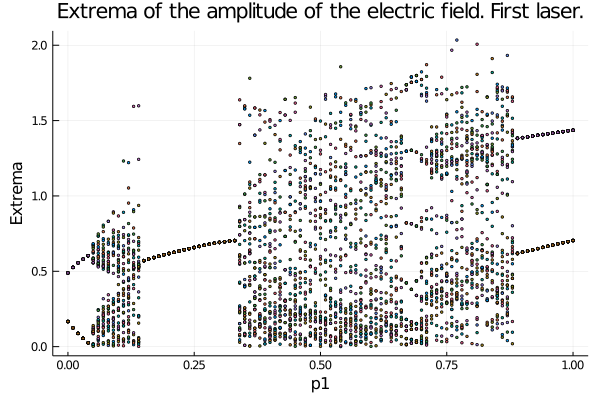

In [40]:
# We plot the results for the first laser.
scatter(x_var, maximum1, markersize=1.5, title = "Extrema of the amplitude of the electric field. First laser.",
    legend=:none, xlabel="p1", ylabel="Extrema")
scatter!(x_var, minimum1, markersize=1.5, legend=:none)

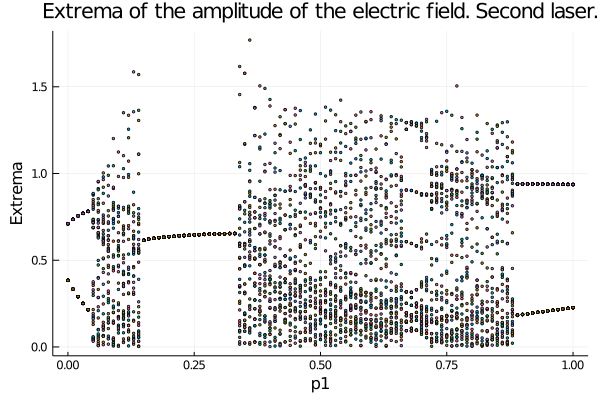

In [41]:
# We plot the results for the second laser.
scatter(x_var, maximum2, markersize=1.5, title = "Extrema of the amplitude of the electric field. Second laser.",
    legend=:none, xlabel="p1", ylabel="Extrema")
scatter!(x_var, minimum2, markersize=1.5, legend=:none)

If you have any questions, please feel free to sent me an email on jonialdshena@gmail.com.  
If I have helped you in research that led to a publication, please be kind enough to cite it, using my Git-Hub acount.